In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
# reading the json file line by line and converting it into table
with open('C:/Users/Admin/OneDrive/Documents/Sarcasm_Headlines_Dataset.json', 'r') as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution'}, xlabel='is_sarcastic'>

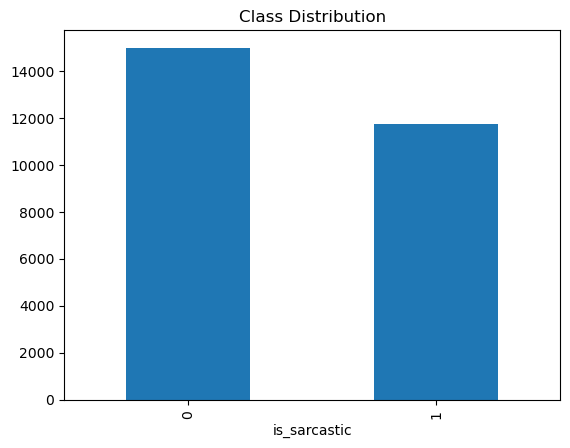

In [19]:
print(df['is_sarcastic'].value_counts())
df['is_sarcastic'].value_counts().plot(kind='bar', title='Class Distribution')
# CHeccking how much distribution between sarcastic and non sarcastic comments

In [21]:
X = df['headline']
y = df['is_sarcastic'] #target

In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = vectorizer.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [27]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
# Accuracy: How many did it get right?
# Precision/Recall/F1: How well does it handle each class?
# Confusion Matrix: Shows which predictions were right or wrong.

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.788655934107076

Classification Report:               precision    recall  f1-score   support

           0       0.79      0.84      0.82      2996
           1       0.78      0.72      0.75      2346

    accuracy                           0.79      5342
   macro avg       0.79      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342


Confusion Matrix:
 [[2526  470]
 [ 659 1687]]
